In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('play_tennis.csv')

In [5]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [7]:
df.shape

(14, 6)

In [11]:
df.describe()

,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [13]:
df.drop(columns=['day'],inplace=True)

In [17]:
 df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


#training phase
look up table is create (calculates all probabilities)

In [52]:
df['play'].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_748\2991447679.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,kde=True)


<Axes: ylabel='Density'>

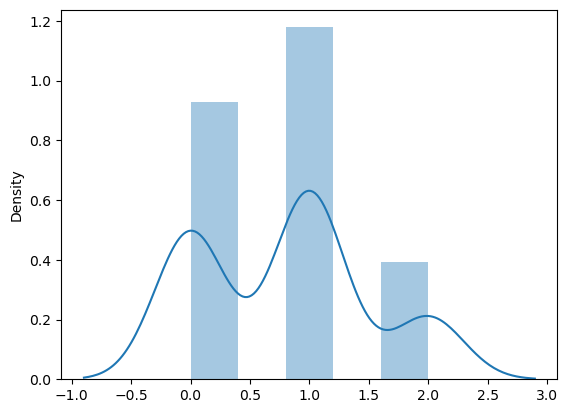

In [72]:
import seaborn as sns
sns.distplot(df,kde=True)

In [56]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df['play'],test_size=0.2,random_state=42)

In [60]:
model=CategoricalNB()
model.fit(X_train,y_train)

CategoricalNB()

In [62]:
y_pred=model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333
